# 1. 实验室介绍

## 1.1 XGBoost的介绍

XGBoost是2016年由华盛顿大学陈天奇老师带领开发的一个可扩展机器学习系统。严格意义上讲XGBoost并不是一种模型，而是一个可供用户轻松解决分类、回归或排序问题的软件包。它内部实现了梯度提升树(GBDT)模型，并对模型中的算法进行了诸多优化，在取得高精度的同时又保持了极快的速度，在一段时间内成为了国内外数据挖掘、机器学习领域中的大规模杀伤性武器。

更重要的是，XGBoost在系统优化和机器学习原理方面都进行了深入的考虑。毫不夸张的讲，XGBoost提供的可扩展性，可移植性与准确性推动了机器学习计算限制的上限，该系统在单台机器上运行速度比当时流行解决方案快十倍以上，甚至在分布式系统中可以处理十亿级的数据。

XGBoost的主要优点：

1. 简单易用。相对其他机器学习库，用户可以轻松使用XGBoost并获得相当不错的效果。
2. 高效可扩展。在处理大规模数据集时速度快效果好，对内存等硬件资源要求不高。
3. 鲁棒性强。相对于深度学习模型不需要精细调参便能取得接近的效果。
4. XGBoost内部实现提升树模型，可以自动处理缺失值。

XGBoost的主要缺点：

1. 相对于深度学习模型无法对时空位置建模，不能很好地捕获图像、语音、文本等高维数据。
2. 在拥有海量训练数据，并能找到合适的深度学习模型时，深度学习的精度可以遥遥领先XGBoost。

## 1.2 XGboost的应用

XGBoost在机器学习与数据挖掘领域有着极为广泛的应用。据统计在2015年Kaggle平台上29个获奖方案中，17只队伍使用了XGBoost；在2015年KDD-Cup中，前十名的队伍均使用了XGBoost，且集成其他模型比不上调节XGBoost的参数所带来的提升。这些实实在在的例子都表明，XGBoost在各种问题上都可以取得非常好的效果。

同时，XGBoost还被成功应用在工业界与学术界的各种问题中。例如商店销售额预测、高能物理事件分类、web文本分类;用户行为预测、运动检测、广告点击率预测、恶意软件分类、灾害风险预测、在线课程退学率预测。虽然领域相关的数据分析和特性工程在这些解决方案中也发挥了重要作用，但学习者与实践者对XGBoost的一致选择表明了这一软件包的影响力与重要性。

# 2. 实验室手册

## 2.1 学习目标

- 了解 XGBoost 的参数与相关知识
- 掌握 XGBoost 的Python调用并将其运用到天气数据集预测

## 2.2 代码流程

Part1 基于天气数据集的XGBoost分类实践

- Step1: 库函数导入 
- Step2: 数据读取/载入 
- Step3: 数据信息简单查看 
- Step4: 可视化描述 
- Step5: 对离散变量进行编码
- Step6: 利用 XGBoost 进行训练与预测
- Step7: 利用 XGBoost 进行特征选择
- Step8: 通过调整参数获得更好的效果

## 2.3 算法实战

## 2.3.1 基于天气数据集的XGBoost分类实战

在实践的最开始，我们首先需要导入一些基础的函数库包括：numpy （Python进行科学计算的基础软件包），pandas（pandas是一种快速，强大，灵活且易于使用的开源数据分析和处理工具），matplotlib和seaborn绘图。

In [ ]:
#导入需要用到的数据集
!wget https://tianchi-media.oss-cn-beijing.aliyuncs.com/DSW/7XGBoost/train.csv

**Step1：函数库导入**

In [ ]:
##  基础函数库
import numpy as np 
import pandas as pd

## 绘图函数库
import matplotlib.pyplot as plt
import seaborn as sns

本次我们选择天气数据集进行方法的尝试训练，现在有一些由气象站提供的每日降雨数据，我们需要根据历史降雨数据来预测明天会下雨的概率。样例涉及到的测试集数据test.csv与train.csv的格式完全相同，但其RainTomorrow未给出，为预测变量。

数据的各个特征描述如下：

| 特征名称      | 意义            | 取值范围 |
|---------------|-----------------|----------|
| Date          | 日期            | 字符串   |
| Location      | 气象站的地址    | 字符串   |
| MinTemp       | 最低温度        | 实数     |
| MaxTemp       | 最高温度        | 实数     |
| Rainfall      | 降雨量          | 实数     |
| Evaporation   | 蒸发量          | 实数     |
| Sunshine      | 光照时间        | 实数     |
| WindGustDir   | 最强的风的方向  | 字符串   |
| WindGustSpeed | 最强的风的速度  | 实数     |
| WindDir9am    | 早上9点的风向   | 字符串   |
| WindDir3pm    | 下午3点的风向   | 字符串   |
| WindSpeed9am  | 早上9点的风速   | 实数     |
| WindSpeed3pm  | 下午3点的风速   | 实数     |
| Humidity9am   | 早上9点的湿度   | 实数     |
| Humidity3pm   | 下午3点的湿度   | 实数     |
| Pressure9am   | 早上9点的大气压 | 实数     |
| Pressure3pm   | 早上3点的大气压 | 实数     |
| Cloud9am      | 早上9点的云指数 | 实数     |
| Cloud3pm      | 早上3点的云指数 | 实数     |
| Temp9am       | 早上9点的温度   | 实数     |
| Temp3pm       | 早上3点的温度   | 实数     |
| RainToday     | 今天是否下雨    | No，Yes  |
| RainTomorrow  | 明天是否下雨    | No，Yes  |

**Step2：数据读取/载入**

In [ ]:
## 我们利用Pandas自带的read_csv函数读取并转化为DataFrame格式

data = pd.read_csv('../data/train.csv')

**Step3：数据信息简单查看**

In [ ]:
## 利用.info()查看数据的整体信息
data.info()

In [ ]:
## 进行简单的数据查看，我们可以利用 .head() 头部.tail()尾部
data.head()

这里我们发现数据集中存在NaN，一般的我们认为NaN在数据集中代表了缺失值，可能是数据采集或处理时产生的一种错误。这里我们采用-1将缺失值进行填补，还有其他例如“中位数填补、平均数填补”的缺失值处理方法有兴趣的同学也可以尝试。

In [ ]:
data = data.fillna(-1)

In [ ]:
data.tail()

In [ ]:
## 利用value_counts函数查看训练集标签的数量
pd.Series(data['RainTomorrow']).value_counts()

我们发现数据集中的负样本数量远大于正样本数量，这种常见的问题叫做“数据不平衡”问题，在某些情况下需要进行一些特殊处理。

In [ ]:
## 对于特征进行一些统计描述
data.describe()

**Step4:可视化描述**

为了方便，我们先纪录数字特征与非数字特征：

In [ ]:
numerical_features = [x for x in data.columns if data[x].dtype == np.float]

In [ ]:
category_features = [x for x in data.columns if data[x].dtype != np.float and x != 'RainTomorrow']

In [ ]:
## 选取三个特征与标签组合的散点可视化
sns.pairplot(data=data[['Rainfall','Evaporation','Sunshine'] + ['RainTomorrow']], diag_kind='hist', hue= 'RainTomorrow')
plt.show()

从上图可以发现，在2D情况下不同的特征组合对于第二天下雨与不下雨的散点分布，以及大概的区分能力。相对的Sunshine与其他特征的组合更具有区分能力

In [ ]:
for col in data[numerical_features].columns:
    if col != 'RainTomorrow':
        sns.boxplot(x='RainTomorrow', y=col, saturation=0.5, palette='pastel', data=data)
        plt.title(col)
        plt.show()

利用箱型图我们也可以得到不同类别在不同特征上的分布差异情况。我们可以发现Sunshine,Humidity3pm,Cloud9am,Cloud3pm的区分能力较强

In [ ]:
tlog = {}
for i in category_features:
    tlog[i] = data[data['RainTomorrow'] == 'Yes'][i].value_counts()
flog = {}
for i in category_features:
    flog[i] = data[data['RainTomorrow'] == 'No'][i].value_counts()

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('RainTomorrow')
sns.barplot(x = pd.DataFrame(tlog['Location']).sort_index()['Location'], y = pd.DataFrame(tlog['Location']).sort_index().index, color = "red")
plt.subplot(1,2,2)
plt.title('Not RainTomorrow')
sns.barplot(x = pd.DataFrame(flog['Location']).sort_index()['Location'], y = pd.DataFrame(flog['Location']).sort_index().index, color = "blue")
plt.show()

从上图可以发现不同地区降雨情况差别很大，有些地方明显更容易降雨

In [ ]:
plt.figure(figsize=(10,2))
plt.subplot(1,2,1)
plt.title('RainTomorrow')
sns.barplot(x = pd.DataFrame(tlog['RainToday'][:2]).sort_index()['RainToday'], y = pd.DataFrame(tlog['RainToday'][:2]).sort_index().index, color = "red")
plt.subplot(1,2,2)
plt.title('Not RainTomorrow')
sns.barplot(x = pd.DataFrame(flog['RainToday'][:2]).sort_index()['RainToday'], y = pd.DataFrame(flog['RainToday'][:2]).sort_index().index, color = "blue")
plt.show()

上图我们可以发现，今天下雨明天不一定下雨，但今天不下雨，第二天大概率也不下雨。

**Step5:对离散变量进行编码**

由于XGBoost无法处理字符串类型的数据，我们需要一些方法讲字符串数据转化为数据。一种最简单的方法是把所有的相同类别的特征编码成同一个值，例如女=0，男=1，狗狗=2，所以最后编码的特征值是在$[0, 特征数量-1]$之间的整数。除此之外，还有独热编码、求和编码、留一法编码等等方法可以获得更好的效果。

In [ ]:
## 把所有的相同类别的特征编码为同一个值
def get_mapfunction(x):
    mapp = dict(zip(x.unique().tolist(),
         range(len(x.unique().tolist()))))
    def mapfunction(y):
        if y in mapp:
            return mapp[y]
        else:
            return -1
    return mapfunction
for i in category_features:
    data[i] = data[i].apply(get_mapfunction(data[i]))

In [ ]:
## 编码后的字符串特征变成了数字

data['Location'].unique()

**Step6：利用 XGBoost 进行训练与预测**

In [ ]:
## 为了正确评估模型性能，将数据划分为训练集和测试集，并在训练集上训练模型，在测试集上验证模型性能。
from sklearn.model_selection import train_test_split

## 选择其类别为0和1的样本 （不包括类别为2的样本）
data_target_part = data['RainTomorrow']
data_features_part = data[[x for x in data.columns if x != 'RainTomorrow']]

## 测试集大小为20%， 80%/20%分
x_train, x_test, y_train, y_test = train_test_split(data_features_part, data_target_part, test_size = 0.2, random_state = 2020)

In [ ]:
## 导入XGBoost模型
from xgboost.sklearn import XGBClassifier
## 定义 XGBoost模型 
clf = XGBClassifier()
# 在训练集上训练XGBoost模型
clf.fit(x_train, y_train)

In [ ]:
## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)
from sklearn import metrics

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))

## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

我们可以发现共有15759 + 2306个样本预测正确，2470 + 794个样本预测错误。

**Step7: 利用 XGBoost 进行特征选择**

XGBoost的特征选择属于特征选择中的嵌入式方法，在XGboost中可以用属性feature_importances_去查看特征的重要度。

In [ ]:
? sns.barplot

In [ ]:
sns.barplot(y=data_features_part.columns, x=clf.feature_importances_)

从图中我们可以发现下午3点的湿度与今天是否下雨是决定第二天是否下雨最重要的因素

初次之外，我们还可以使用XGBoost中的下列重要属性来评估特征的重要性。

- weight:是以特征用到的次数来评价
- gain:当利用特征做划分的时候的评价基尼指数
- cover:利用一个覆盖样本的指标二阶导数（具体原理不清楚有待探究）平均值来划分。
- total_gain:总基尼指数
- total_cover:总覆盖

In [ ]:
from sklearn.metrics import accuracy_score
from xgboost import plot_importance

def estimate(model,data):

    #sns.barplot(data.columns,model.feature_importances_)
    ax1=plot_importance(model,importance_type="gain")
    ax1.set_title('gain')
    ax2=plot_importance(model, importance_type="weight")
    ax2.set_title('weight')
    ax3 = plot_importance(model, importance_type="cover")
    ax3.set_title('cover')
    plt.show()
def classes(data,label,test):
    model=XGBClassifier()
    model.fit(data,label)
    ans=model.predict(test)
    estimate(model, data)
    return ans
 
ans=classes(x_train,y_train,x_test)
pre=accuracy_score(y_test, ans)
print('acc=',accuracy_score(y_test,ans))


这些图同样可以帮助我们更好的了解其他重要特征。

**Step8: 通过调整参数获得更好的效果**

XGBoost中包括但不限于下列对模型影响较大的参数：
1. learning_rate: 有时也叫作eta，系统默认值为0.3。每一步迭代的步长，很重要。太大了运行准确率不高，太小了运行速度慢。
2. subsample：系统默认为1。这个参数控制对于每棵树，随机采样的比例。减小这个参数的值，算法会更加保守，避免过拟合, 取值范围零到一。
3. colsample_bytree：系统默认值为1。我们一般设置成0.8左右。用来控制每棵随机采样的列数的占比(每一列是一个特征)。
4. max_depth： 系统默认值为6，我们常用3-10之间的数字。这个值为树的最大深度。这个值是用来控制过拟合的。max_depth越大，模型学习的更加具体。

调节模型参数的方法有贪心算法、网格调参、贝叶斯调参等。这里我们采用网格调参，它的基本思想是穷举搜索：在所有候选的参数选择中，通过循环遍历，尝试每一种可能性，表现最好的参数就是最终的结果

In [ ]:
## 从sklearn库中导入网格调参函数
from sklearn.model_selection import GridSearchCV

## 定义参数取值范围
learning_rate = [0.1, 0.3, 0.6]
subsample = [0.8, 0.9]
colsample_bytree = [0.6, 0.8]
max_depth = [3,5,8]

parameters = { 'learning_rate': learning_rate,
              'subsample': subsample,
              'colsample_bytree':colsample_bytree,
              'max_depth': max_depth}
model = XGBClassifier(n_estimators = 50)

## 进行网格搜索
clf = GridSearchCV(model, parameters, cv=3, scoring='accuracy',verbose=1,n_jobs=-1)
clf = clf.fit(x_train, y_train)

In [ ]:
## 网格搜索后的最好参数为

clf.best_params_

In [ ]:
## 在训练集和测试集上分布利用最好的模型参数进行预测

## 定义带参数的 XGBoost模型 
clf = XGBClassifier(colsample_bytree = 0.6, learning_rate = 0.3, max_depth= 8, subsample = 0.9)
# 在训练集上训练XGBoost模型
clf.fit(x_train, y_train)

train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))

## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

原本有2470 + 790个错误，现在有 2112 + 939个错误，带来了明显的正确率提升。

## 2.4 重要知识点

### 2.4.1 XGBoost的重要参数

1.**eta**[默认0.3]    
通过为每一颗树增加权重，提高模型的鲁棒性。   
典型值为0.01-0.2。   

2.**min_child_weight**[默认1]    
决定最小叶子节点样本权重和。    
这个参数可以避免过拟合。当它的值较大时，可以避免模型学习到局部的特殊样本。    
但是如果这个值过高，则会导致模型拟合不充分。  

3.**max_depth**[默认6]     
这个值也是用来避免过拟合的。max_depth越大，模型会学到更具体更局部的样本。        
典型值：3-10     

4.**max_leaf_nodes**     
树上最大的节点或叶子的数量。   
可以替代max_depth的作用。     
这个参数的定义会导致忽略max_depth参数。    

5.**gamma**[默认0]      
在节点分裂时，只有分裂后损失函数的值下降了，才会分裂这个节点。Gamma指定了节点分裂所需的最小损失函数下降值。
这个参数的值越大，算法越保守。这个参数的值和损失函数息息相关。   

6.**max_delta_step**[默认0]    
这参数限制每棵树权重改变的最大步长。如果这个参数的值为0，那就意味着没有约束。如果它被赋予了某个正值，那么它会让这个算法更加保守。   
但是当各类别的样本十分不平衡时，它对分类问题是很有帮助的。   

7.**subsample**[默认1]     
这个参数控制对于每棵树，随机采样的比例。   
减小这个参数的值，算法会更加保守，避免过拟合。但是，如果这个值设置得过小，它可能会导致欠拟合。    
典型值：0.5-1   
  
8.**colsample_bytree**[默认1]    
用来控制每棵随机采样的列数的占比(每一列是一个特征)。   
典型值：0.5-1   

9.**colsample_bylevel**[默认1]   
用来控制树的每一级的每一次分裂，对列数的采样的占比。   
subsample参数和colsample_bytree参数可以起到相同的作用，一般用不到。

10.**lambda**[默认1]    
权重的L2正则化项。(和Ridge regression类似)。    
这个参数是用来控制XGBoost的正则化部分的。虽然大部分数据科学家很少用到这个参数，但是这个参数在减少过拟合上还是可以挖掘出更多用处的。    

11.**alpha**[默认1]    
权重的L1正则化项。(和Lasso regression类似)。  
可以应用在很高维度的情况下，使得算法的速度更快。     

12.**scale_pos_weight**[默认1]    
在各类别样本十分不平衡时，把这个参数设定为一个正值，可以使算法更快收敛。    


### 2.4.2 XGBoost原理粗略讲解

XGBoost底层实现了GBDT算法，并对GBDT算法做了一系列优化：
1. 对目标函数进行了泰勒展示的二阶展开，可以更加高效拟合误差。
2. 提出了一种估计分裂点的算法加速CART树的构建过程，同时可以处理稀疏数据。
3. 提出了一种树的并行策略加速迭代。
4. 为模型的分布式算法进行了底层优化。

XGBoost是基于CART树的集成模型，它的思想是串联多个决策树模型共同进行决策。

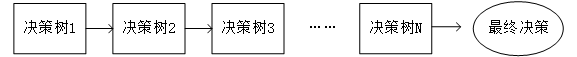

那么如何串联呢？XGBoost采用迭代预测误差的方法串联。举个通俗的例子，我们现在需要预测一辆车价值3000元。我们构建决策树1训练后预测为2600元，我们发现有400元的误差，那么决策树2的训练目标为400元，但决策树2的预测结果为350元，还存在50元的误差就交给第三棵树……以此类推，每一颗树用来估计之前所有树的误差，最后所有树预测结果的求和就是最终预测结果！

XGBoost的基模型是CART回归树，它有两个特点：（1）CART树，是一颗二叉树。（2）回归树，最后拟合结果是连续值。

XGBoost模型可以表示为以下形式，我们约定$f_t(x)$表示前$t$颗树的和，$h_t(x)$表示第$t$颗决策树，模型定义如下：

$f_{t}(x)=\sum_{t=1}^{T} h_{t}(x)$

由于模型递归生成，第$t$步的模型由第$t-1$步的模型形成，可以写成：

$f_{t}(x)=f_{t-1}(x)+h_{t}(x)$

每次需要加上的树$h_t(x)$是之前树求和的误差：

$r_{t, i}=y_{i}-f_{m-1}\left(x_{i}\right)$

我们每一步只要拟合一颗输出为$r_{t,i}$的CART树加到$f_{t-1}(x)$就可以了。